In [1]:
import pandas as pd
import  numpy as np
import matplotlib

In [2]:
df = pd.read_csv('distinct_subject_features.csv', dtype={"value": str})

In [3]:
df

,subject_id,anchor_age,gender,label,value,valueuom,flag
0,16567081,65,M,Yeast,NONE,/hpf,NaN
1,16877538,51,M,Yeast,NONE,NaN,NaN
2,18319940,81,M,Ketone,NEG,mg/dL,NaN
3,19624730,67,M,Barbiturate Screen,NEG,NaN,NaN
4,19895786,83,M,Benzodiazepine Screen,NEG,NaN,NaN
...,...,...,...,...,...,...,...
7278140,11301742,79,M,Asparate Aminotransferase (AST),12,IU/L,NaN
7278141,14166471,66,M,Asparate Aminotransferase (AST),98,IU/L,abnormal
7278142,10916053,58,M,Asparate Aminotransferase (AST),790,IU/L,abnormal
7278143,10371464,79,M,Asparate Aminotransferase (AST),19,IU/L,NaN


In [4]:
#extrcat subject_id, gender and age in a spe table
df_subjects = df[["subject_id", "anchor_age", "gender"]]
df_subjects = df_subjects.drop_duplicates(["subject_id"])

In [5]:
df_subjects.shape

(21167, 3)

In [6]:
mf = df_subjects.gender.value_counts().sort_values()
mf.F

8663

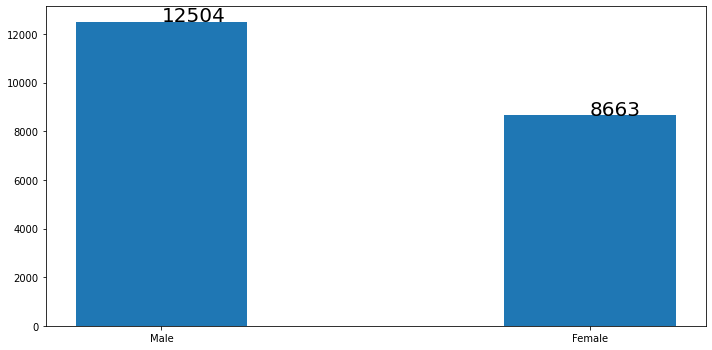

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt

x = ["Male", "Female"]
y = [mf.M, mf.F]

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x,y,width=0.4)
for index,data in enumerate(y):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20))
plt.tight_layout()
plt.savefig('test.png', dpi=300)
plt.show()




In [15]:
#count of number of patients
no_of_pat = df.subject_id.unique()
print("number of patients :", no_of_pat.shape)
x = df.gender.value_counts().sort_values()
x

number of patients : (21167,)


F    2914889
M    4363256
Name: gender, dtype: int64

<AxesSubplot:>

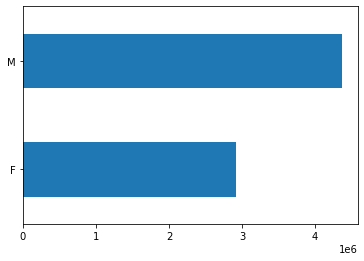

In [12]:
df.gender.value_counts().sort_values().plot(kind = 'barh')

In [419]:
#df['labelvalue_with_flag_unit'] = list(zip(df.value, df.flag, df.valueuom))

In [420]:
df.head()

,subject_id,anchor_age,gender,label,value,valueuom,flag
0,16567081,65,M,Yeast,NONE,/hpf,NaN
1,16877538,51,M,Yeast,NONE,NaN,NaN
2,18319940,81,M,Ketone,NEG,mg/dL,NaN
3,19624730,67,M,Barbiturate Screen,NEG,NaN,NaN
4,19895786,83,M,Benzodiazepine Screen,NEG,NaN,NaN


In [421]:
df = df.drop([ 'valueuom', 'flag'], axis=1)

In [422]:
df.head()
df = df[:20]

In [423]:
df

,subject_id,anchor_age,gender,label,value
0,16567081,65,M,Yeast,NONE
1,16877538,51,M,Yeast,NONE
2,18319940,81,M,Ketone,NEG
3,19624730,67,M,Barbiturate Screen,NEG
4,19895786,83,M,Benzodiazepine Screen,NEG
5,16392858,53,M,Specimen Type,ART.
6,15710484,64,M,Specimen Type,ART.
7,17169886,68,M,Troponin T,0.02
8,19458874,56,M,Oxygen Saturation,74
9,14814865,77,F,% Hemoglobin A1c,8.6


In [424]:
df.value = df.value.replace({"NONE": 0, "NEG": -1})

In [425]:
df = df[pd.to_numeric(df['value'], errors='coerce').notnull()]
df['value'] = pd.to_numeric(df["value"], downcast="float")
df

/Users/priyakumari/Documents/MIMICData/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,subject_id,anchor_age,gender,label,value
0,16567081,65,M,Yeast,0.00
1,16877538,51,M,Yeast,0.00
2,18319940,81,M,Ketone,-1.00
3,19624730,67,M,Barbiturate Screen,-1.00
4,19895786,83,M,Benzodiazepine Screen,-1.00
7,17169886,68,M,Troponin T,0.02
8,19458874,56,M,Oxygen Saturation,74.00
9,14814865,77,F,% Hemoglobin A1c,8.60
10,16967171,70,F,Troponin T,0.05
11,18562803,24,F,tacroFK,9.00


In [426]:
 df = df.pivot_table(values='value', index=['subject_id', 'anchor_age', 'gender'], columns='label', aggfunc=np.mean, fill_value=0)


In [427]:
#df = df.pivot(columns='label')

In [428]:
df.head(1)

,,label,% Hemoglobin A1c,Barbiturate Screen,Benzodiazepine Screen,Ketone,Oxygen Saturation,"Total Protein, Urine",Tricyclic Antidepressant Screen,Triglycerides,Troponin T,Yeast,tacroFK
subject_id,anchor_age,gender,,,,,,,,,,,
10259270,64,F,0.0,0,0,0,0,0,0,0,0.04,0,0


In [415]:
df.iloc[:1, 30:]

,,label,"Cholesterol, Total",Cortisol,"Creatine Kinase, MB Isoenzyme","Creatinine, Urine",Cyclosporin,D-Dimer,Digoxin,Epithelial Cells,Ferritin,"Fibrinogen, Functional",...,"Urea Nitrogen, Urine",Uric Acid,Urobilinogen,Valproic Acid,Vancomycin,Vitamin B12,WBC,Yeast,eAG,tacroFK
subject_id,anchor_age,gender,,,,,,,,,,,,,,,,,,,,,
10002013,53,F,0,0.0,0,0,0,0,0.0,0,0,0,...,0,0.0,0,0,0.0,0,0,0,0,0.0


In [20]:
df = df.sort_values(by=['subject_id'])
df = df.drop(['flag'], axis=1)

In [22]:
df = df.pivot_table('value', 'subject_id','anchor_age', 'gender', 'valueuom', 'label')

/Users/priyakumari/Documents/MIMICData/env/lib/python3.7/site-packages/pandas/core/apply.py:507: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  return self._try_aggregate_string_function(obj, f, *self.args, **self.kwargs)


In [23]:
df.head(20)

Empty DataFrame
Columns: []
Index: [(10000980, 73, F,  ), (10000980, 73, F, #/hpf), (10000980, 73, F, #/lpf), (10000980, 73, F, %), (10000980, 73, F, IU/L), (10000980, 73, F, K/uL), (10000980, 73, F, Ratio), (10000980, 73, F, fL), (10000980, 73, F, g/dL), (10000980, 73, F, m/uL), (10000980, 73, F, mEq/L), (10000980, 73, F, mg/dL), (10000980, 73, F, mm Hg), (10000980, 73, F, ng/mL), (10000980, 73, F, pg), (10000980, 73, F, pg/mL), (10000980, 73, F, sec), (10000980, 73, F, units), (10002013, 53, F,  ), (10002013, 53, F, #/hpf)]